In [50]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [72]:
dataset_path = Path('Plants')

In [73]:
treeDataBlock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                         item_tfms=Resize(128),
                         get_items=get_image_files,
                         splitter=RandomSplitter(valid_pct=0.2, seed=42),
                         get_y=parent_label)

In [54]:
temp = dataset_path/Path("coconut")
temp.ls()

(#360) [Path('Plants/coconut/00000344.jpg?v=3121068'),Path('Plants/coconut/00000087.jpg'),Path('Plants/coconut/00000303.jpg'),Path('Plants/coconut/00000298.jpg'),Path('Plants/coconut/00000195.jpg'),Path('Plants/coconut/00000204.jpg'),Path('Plants/coconut/00000057.png'),Path('Plants/coconut/00000135.jpg'),Path('Plants/coconut/00000054.jpg'),Path('Plants/coconut/00000233.jpg')...]

In [74]:
dls = treeDataBlock.dataloaders(dataset_path)

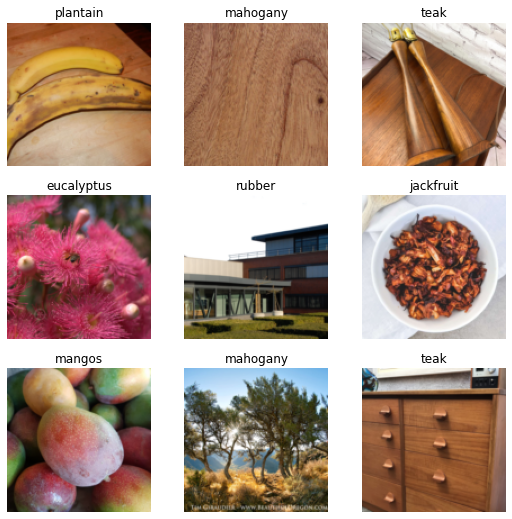

In [75]:
dls.valid.show_batch()

In [26]:
failed = verify_images(fnames)
failed

(#72) [Path('Plants/mangos/00000233.jpg'),Path('Plants/mangos/00000056.jpg'),Path('Plants/mangos/00000045.jpg'),Path('Plants/mangos/00000363.png'),Path('Plants/plantain/00000267.jpg'),Path('Plants/plantain/00000369.png'),Path('Plants/rubber/00000111.jpg'),Path('Plants/rubber/00000302.jpg'),Path('Plants/rubber/00000294.jpg'),Path('Plants/rubber/00000382.jpg')...]

In [27]:
failed.map(Path.unlink)

(#72) [None,None,None,None,None,None,None,None,None,None...]

In [69]:
fnames = get_image_files(dataset_path)

In [33]:
fnames

(#2627) [Path('Plants/mangos/00000151.JPG'),Path('Plants/mangos/00000218.jpg'),Path('Plants/mangos/00000013.jpg'),Path('Plants/mangos/00000087.jpg'),Path('Plants/mangos/00000298.jpg'),Path('Plants/mangos/00000082.png'),Path('Plants/mangos/00000204.jpg'),Path('Plants/mangos/00000011.jpg'),Path('Plants/mangos/00000135.jpg'),Path('Plants/mangos/00000054.jpg')...]

In [70]:
fnames

(#2602) [Path('Plants/mangos/00000151.JPG'),Path('Plants/mangos/00000218.jpg'),Path('Plants/mangos/00000013.jpg'),Path('Plants/mangos/00000087.jpg'),Path('Plants/mangos/00000298.jpg'),Path('Plants/mangos/00000082.png'),Path('Plants/mangos/00000204.jpg'),Path('Plants/mangos/00000011.jpg'),Path('Plants/mangos/00000135.jpg'),Path('Plants/mangos/00000054.jpg')...]

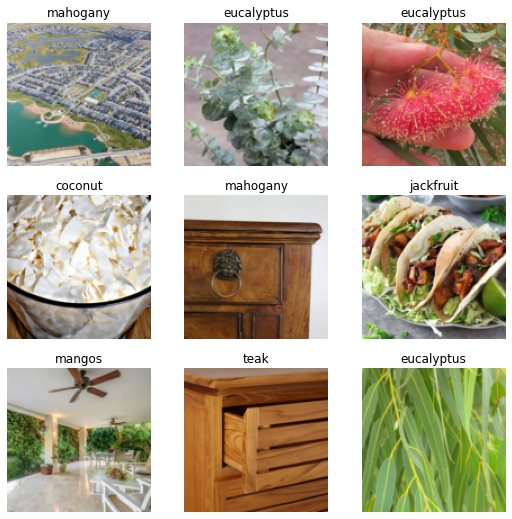

In [71]:
dls.show_batch()

In [77]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)


/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubun

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.001737800776027143)

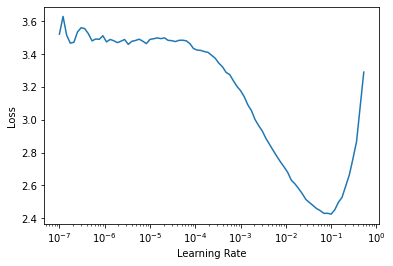

In [79]:
learn.lr_find()

In [37]:
! pwd

/home/ubuntu/personell/fastai/Projects-minor/Plant Classifier


In [80]:
learn.fine_tune(2, 5e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.867929,1.127800,0.284615,01:47


/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.072222,1.246757,0.313462,02:23
1,0.702914,0.856838,0.250000,02:27


/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubun

In [81]:
learn.export()

/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


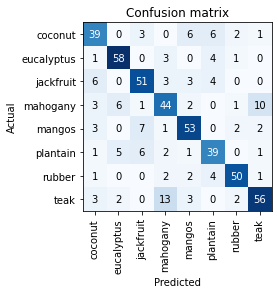

In [82]:
interep = ClassificationInterpretation.from_learner(learn)
interep.plot_confusion_matrix()

/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


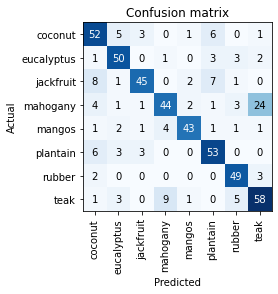

In [62]:
interep = ClassificationInterpretation.from_learner(learn)
interep.plot_confusion_matrix()

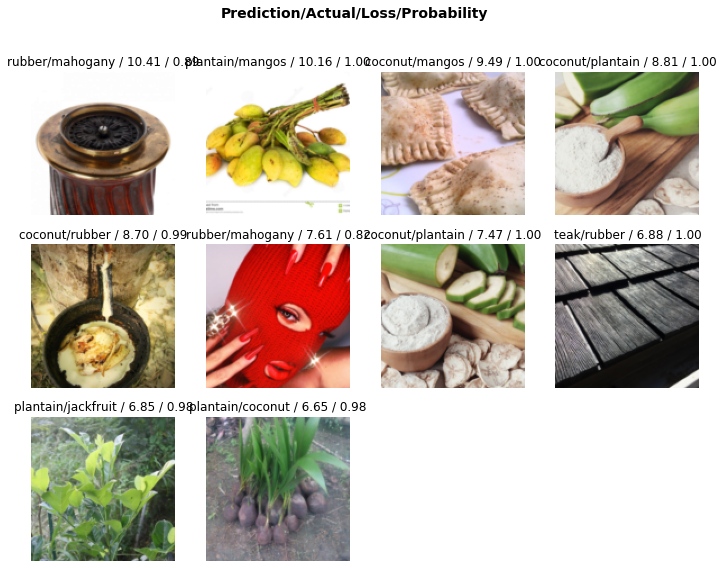

In [63]:
interep.plot_top_losses(10, nrows=3)

In [64]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/ubuntu/personell/fastai/.env/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [67]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [68]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), dataset_path/cat)